In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.utils.data_utils import get_file
from keras import regularizers
from keras.optimizers import SGD

tf.test.gpu_device_name()
device_lib.list_local_devices()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 128)      

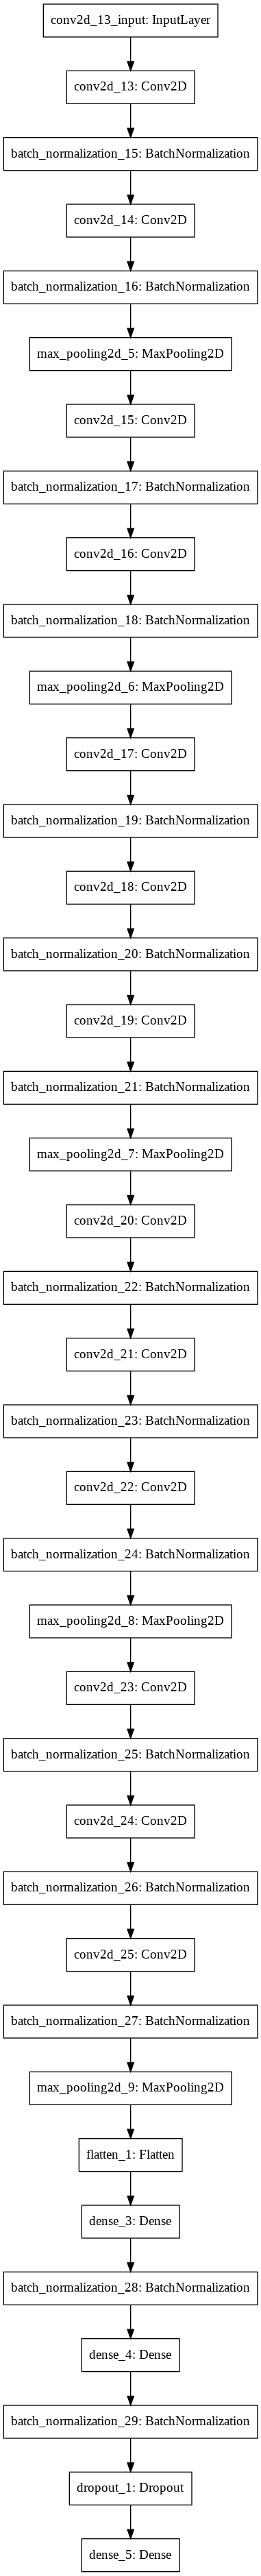

In [21]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# mean = np.mean(x_train,axis=(0,1,2,3))
# std = np.std(x_train, axis=(0, 1, 2, 3))
# x_train = (x_train-mean)/(std+1e-7)
# x_test  = (x_test-mean)/(std+1e-7)

y_train_label = y_train
y_test_label  = y_test

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# Variables
batch_size = 32
num_classes = 10
epochs = 10
iterations = 391
weight_decay = 0.0005
log_filepath = r'./vgg16_pretain/'


# my model - VGG16
model = keras.Sequential()
# Block 1
model.add(keras.layers.Conv2D(64,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(64,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 2
model.add(keras.layers.Conv2D(128,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(128,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 3
model.add(keras.layers.Conv2D(256,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(256,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(256,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 4
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 5
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()
plot_model(model, to_file='model.png')

In [22]:
# Optimizer Setting
# sgd = SGD(lr=0.1, momentum=0.9, nesterov=True)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile and Fit
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size, validation_split=0.1,verbose=1,validation_data=(x_test,y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Accuracy',test_acc)

Epoch 1/10
1407/1407 [==============================] - 33s 23ms/step - loss: 8.2876 - accuracy: 0.2326 - val_loss: 7.9708 - val_accuracy: 0.2074
Epoch 2/10
1407/1407 [==============================] - 32s 23ms/step - loss: 6.4391 - accuracy: 0.3213 - val_loss: 5.6253 - val_accuracy: 0.3256
Epoch 3/10
1407/1407 [==============================] - 33s 23ms/step - loss: 4.9610 - accuracy: 0.4302 - val_loss: 4.3986 - val_accuracy: 0.4588
Epoch 4/10
1407/1407 [==============================] - 32s 23ms/step - loss: 3.8825 - accuracy: 0.5262 - val_loss: 3.5239 - val_accuracy: 0.5466
Epoch 5/10
1407/1407 [==============================] - 32s 23ms/step - loss: 3.1061 - accuracy: 0.5958 - val_loss: 2.7879 - val_accuracy: 0.6490
Epoch 6/10
1407/1407 [==============================] - 32s 23ms/step - loss: 2.4944 - accuracy: 0.6666 - val_loss: 2.5745 - val_accuracy: 0.6882
Epoch 7/10
1407/1407 [==============================] - 33s 23ms/step - loss: 2.0434 - accuracy: 0.7196 - val_loss: 1.9910 -

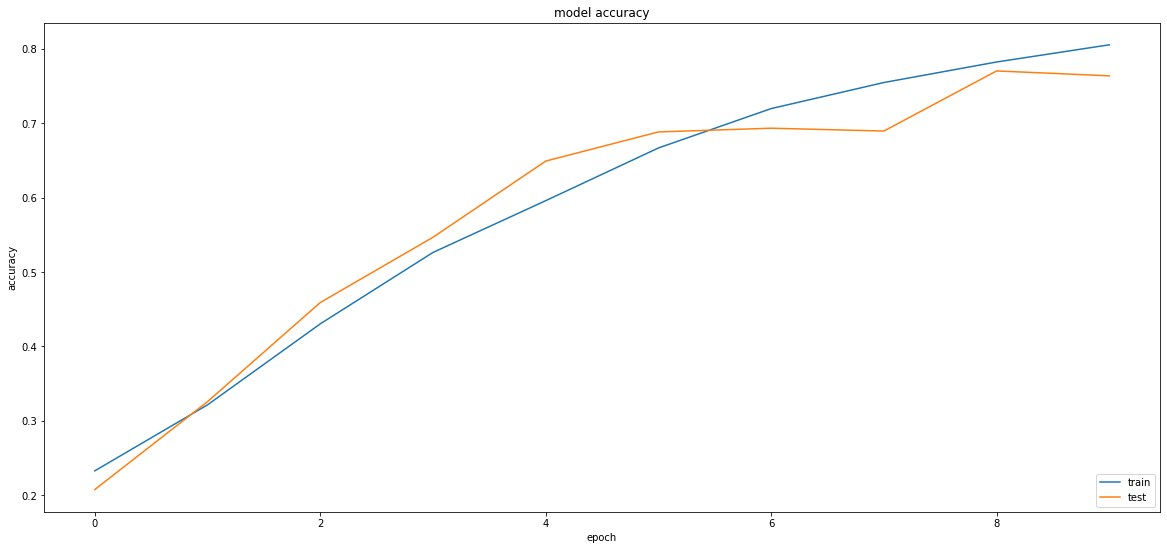

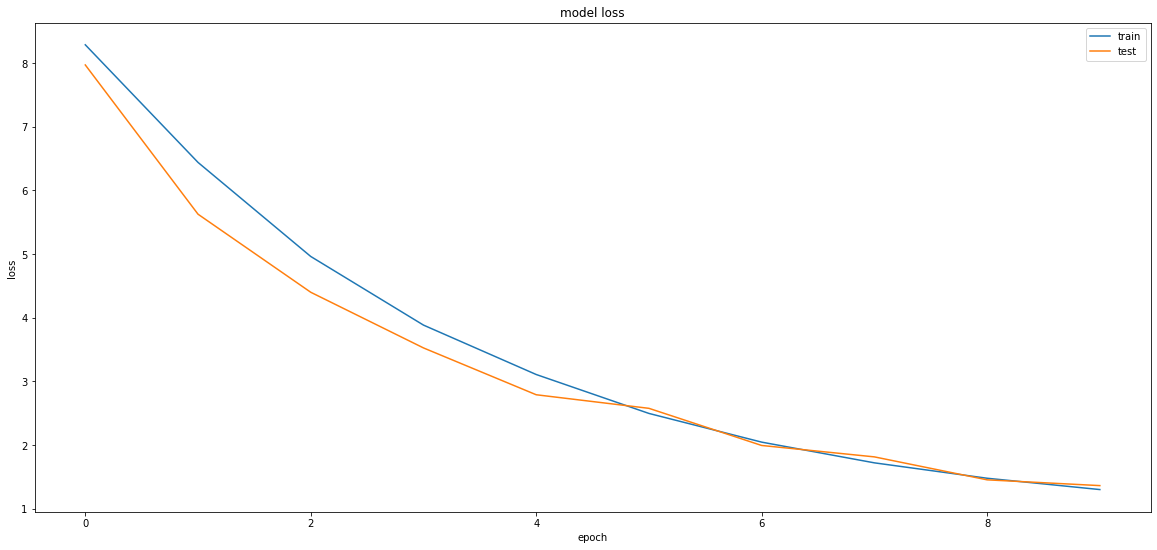

In [23]:
# Plotting
fig = plt.figure()
plt.plot()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.show()

plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('model_loss.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


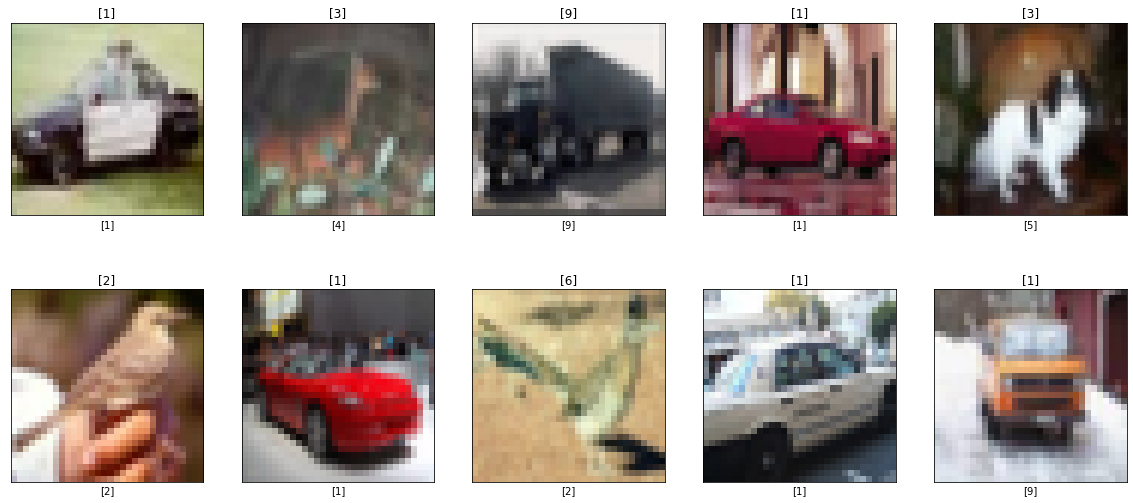

In [29]:
# Predict
# 0 = Airplane, 1 = Automobile, 2 = Bird, 3 = Cat, 4 = Deer
# 5 = Dog, 6 = Frog, 7 = Horse, 8 = Ship, 9 = Truck
from random import randint


for i in range(10):  
    plt.subplot(2,5,i+1)
    plt.rcParams["figure.figsize"] = (20,9)
    index = randint(0,9999)
    plt.imshow(x_test[index].astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    prediction = model.predict_classes(x_test[index].reshape(-1,32,32,3))
    plt.xlabel(y_test_label[index])
    plt.title(prediction)
    plt.savefig('test_set.png')
plt.show()

